In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

plt.style.use('dark_background')

In [2]:
df=pd.read_csv("D:\My Stuff\Educational Stuff\VIT\Year 4\Fall Semester 2021-'22\GIS\Embedded Theory\Additional Learning\weatherAus.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df=df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location","Date"],axis=1)
df=df.dropna(axis=0)

In [7]:
df.head()
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
le=LabelEncoder()
df['WindGustDir']=le.fit_transform(df['WindGustDir'])
df['WindDir9am']=le.fit_transform(df['WindDir9am'])
df['WindDir3pm']=le.fit_transform(df['WindDir3pm'])
df['RainToday']=le.fit_transform(df['RainToday'])
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])
x=df.drop(['RainTomorrow'],axis=1)
y=df['RainTomorrow']
print(x.head)

<bound method NDFrame.head of         MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0          13.4     22.9       0.6           13           44.0          13   
1           7.4     25.1       0.0           14           44.0           6   
2          12.9     25.7       0.0           15           46.0          13   
3           9.2     28.0       0.0            4           24.0           9   
4          17.5     32.3       1.0           13           41.0           1   
...         ...      ...       ...          ...            ...         ...   
145454      3.5     21.8       0.0            0           31.0           2   
145455      2.8     23.4       0.0            0           31.0           9   
145456      3.6     25.3       0.0            6           22.0           9   
145457      5.4     26.9       0.0            3           37.0           9   
145458      7.8     27.0       0.0            9           28.0          10   

        WindDir3pm  WindSpeed9am 

<AxesSubplot:xlabel='MaxTemp', ylabel='MinTemp'>

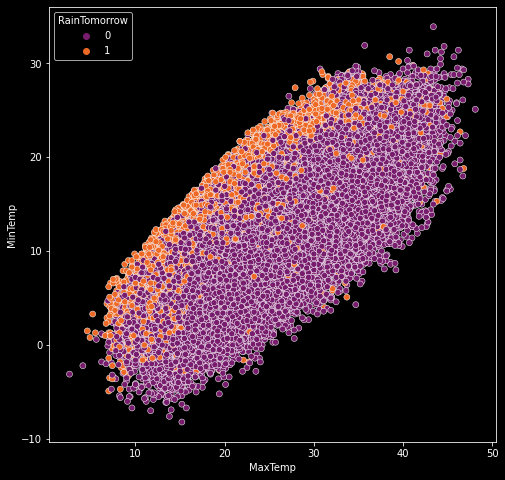

In [9]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='MaxTemp',y='MinTemp',hue='RainTomorrow',palette='inferno',data=df)

<AxesSubplot:xlabel='Humidity9am', ylabel='Temp9am'>

C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


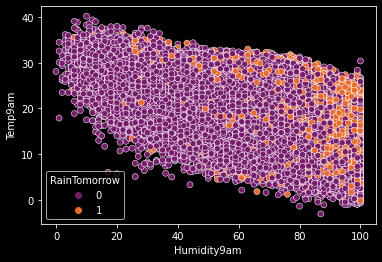

In [10]:
sns.scatterplot(x='Humidity9am',y='Temp9am',hue='RainTomorrow',palette='inferno',data=df)

<AxesSubplot:>

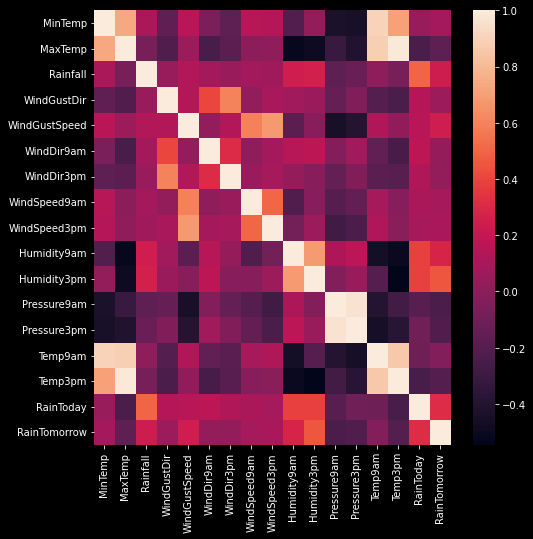

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [18]:
#improved logres score by increasing max iters, it was 84.4 now it is 84.8, an increase of 0.4
logres=LogisticRegression(max_iter=1000)
logres.fit(x_train,y_train)
predictions=logres.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[16736   891]
 [ 2533  2425]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17627
           1       0.73      0.49      0.59      4958

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585

0.8483949524020368


In [19]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predictions=dtc.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[15154  2473]
 [ 2301  2657]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     17627
           1       0.52      0.54      0.53      4958

    accuracy                           0.79     22585
   macro avg       0.69      0.70      0.70     22585
weighted avg       0.79      0.79      0.79     22585

0.7886207659951295


In [20]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[16827   800]
 [ 2430  2528]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     17627
           1       0.76      0.51      0.61      4958

    accuracy                           0.86     22585
   macro avg       0.82      0.73      0.76     22585
weighted avg       0.85      0.86      0.85     22585

0.856984724374585


In [27]:
#time for some extreme gradient boosting
xgb=xgb.XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

C:\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[16672   955]
 [ 2267  2691]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     17627
           1       0.74      0.54      0.63      4958

    accuracy                           0.86     22585
   macro avg       0.81      0.74      0.77     22585
weighted avg       0.85      0.86      0.85     22585

0.8573389417755147
